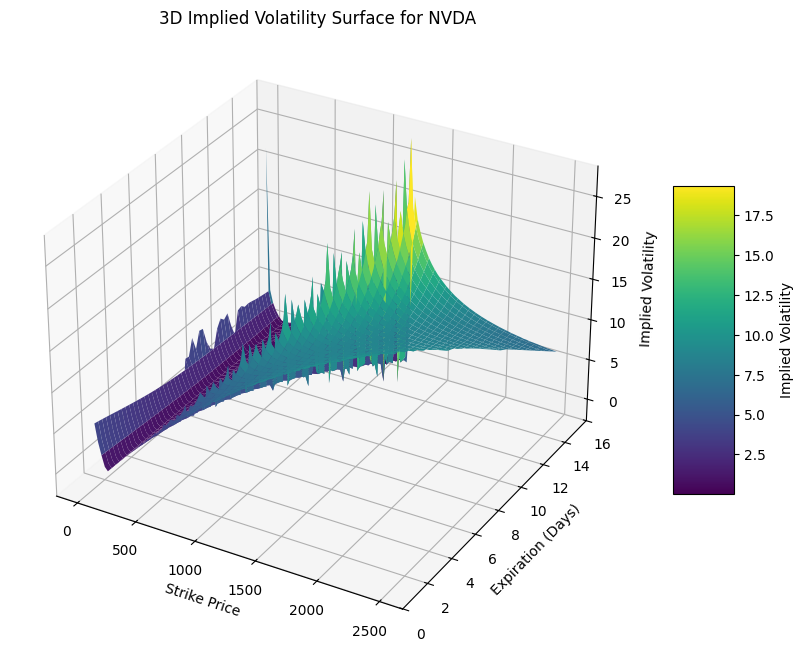

In [1]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from datetime import datetime
from mpl_toolkits.mplot3d import Axes3D

# Define the ticker symbol
ticker = 'NVDA'

# Fetch the options data for a given stock ticker
stock = yf.Ticker(ticker)

# Initialize lists to store strikes, expirations, and implied volatilities
strikes = []
expirations = []
implied_vols = []

# Get the list of expiration dates
exp_dates = stock.options[:3]  # Limit to first 3 expiration dates for this example

# Loop through expiration dates and strikes to collect implied volatility data
for exp_date in exp_dates:
    options = stock.option_chain(exp_date)
    calls = options.calls  # We focus on call options in this example

    # Loop through each call option's strike and implied volatility
    for index, row in calls.iterrows():
        strike = row['strike']
        iv = row['impliedVolatility']
        expiration_days = (datetime.strptime(exp_date, '%Y-%m-%d') - datetime.now()).days

        # Store data
        strikes.append(strike)
        expirations.append(expiration_days)
        implied_vols.append(iv)

# Convert to numpy arrays
strikes = np.array(strikes)
expirations = np.array(expirations)
implied_vols = np.array(implied_vols)

# Create a grid for strikes and expirations for interpolation
strike_grid = np.linspace(min(strikes), max(strikes), 100)
expiration_grid = np.linspace(min(expirations), max(expirations), 100)
strike_grid, expiration_grid = np.meshgrid(strike_grid, expiration_grid)

# Interpolating the implied volatilities over the 2D space
implied_vols_grid = griddata(
    (strikes, expirations),
    implied_vols,
    (strike_grid, expiration_grid),
    method='cubic'
)

# Plot the interpolated volatility surface in 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surf = ax.plot_surface(strike_grid, expiration_grid, implied_vols_grid, cmap='viridis', edgecolor='none')

# Add color bar and labels
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5, label="Implied Volatility")
ax.set_xlabel("Strike Price")
ax.set_ylabel("Expiration (Days)")
ax.set_zlabel("Implied Volatility")
ax.set_title(f"3D Implied Volatility Surface for {ticker}")

plt.show()


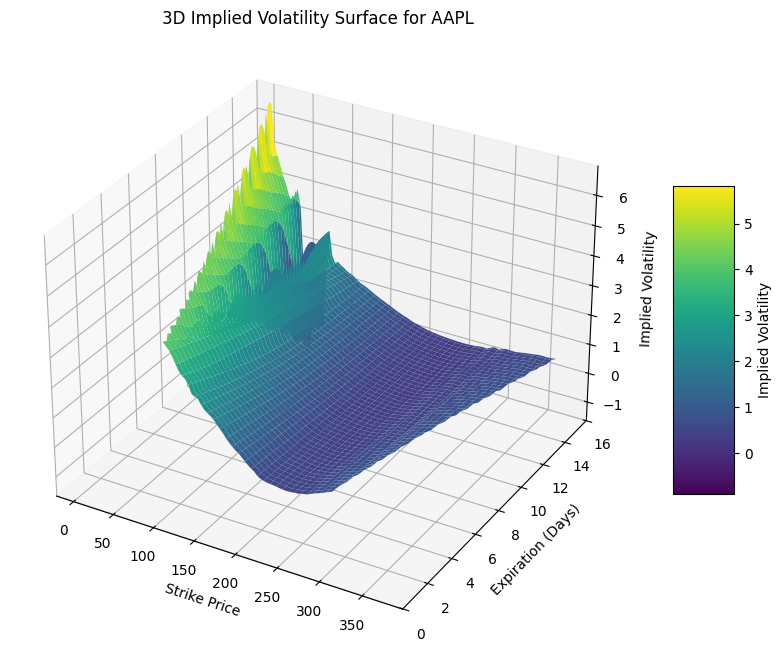

In [2]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from datetime import datetime
from mpl_toolkits.mplot3d import Axes3D

# Define the ticker symbol
ticker = 'AAPL'

# Fetch the options data for a given stock ticker
stock = yf.Ticker(ticker)

# Initialize lists to store strikes, expirations, and implied volatilities
strikes = []
expirations = []
implied_vols = []

# Get the list of expiration dates
exp_dates = stock.options[:3]  # Limit to first 3 expiration dates for this example

# Loop through expiration dates and strikes to collect implied volatility data
for exp_date in exp_dates:
    options = stock.option_chain(exp_date)
    calls = options.calls  # We focus on call options in this example

    # Loop through each call option's strike and implied volatility
    for index, row in calls.iterrows():
        strike = row['strike']
        iv = row['impliedVolatility']
        expiration_days = (datetime.strptime(exp_date, '%Y-%m-%d') - datetime.now()).days

        # Store data
        strikes.append(strike)
        expirations.append(expiration_days)
        implied_vols.append(iv)

# Convert to numpy arrays
strikes = np.array(strikes)
expirations = np.array(expirations)
implied_vols = np.array(implied_vols)

# Create a grid for strikes and expirations for interpolation
strike_grid = np.linspace(min(strikes), max(strikes), 100)
expiration_grid = np.linspace(min(expirations), max(expirations), 100)
strike_grid, expiration_grid = np.meshgrid(strike_grid, expiration_grid)

# Interpolating the implied volatilities over the 2D space
implied_vols_grid = griddata(
    (strikes, expirations),
    implied_vols,
    (strike_grid, expiration_grid),
    method='cubic'
)

# Plot the interpolated volatility surface in 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surf = ax.plot_surface(strike_grid, expiration_grid, implied_vols_grid, cmap='viridis', edgecolor='none')

# Add color bar and labels
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5, label="Implied Volatility")
ax.set_xlabel("Strike Price")
ax.set_ylabel("Expiration (Days)")
ax.set_zlabel("Implied Volatility")
ax.set_title(f"3D Implied Volatility Surface for {ticker}")

plt.show()
